<a href="https://colab.research.google.com/github/shahabas9/Deep_learning_basics/blob/main/fine_tuning_%26_pretrained_model_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [4]:
import numpy as np

In [5]:
model=VGG16(weights="imagenet")

553467096/553467096 [==============================] - 6s 0us/step


In [6]:
image_path="/content/beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg"

In [16]:
image_read=image.load_img(image_path,target_size=(224,224))

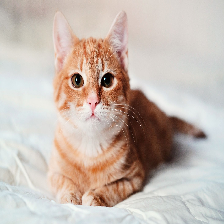

In [17]:
image_read

In [18]:
img=image.img_to_array(image_read)

In [19]:
img=np.expand_dims(img,axis=0)

In [20]:
img.shape

(1, 224, 224, 3)

In [22]:
predictions=model.predict(img)

1/1 [==============================] - 0s 26ms/step


In [23]:
decode_predictions(predictions)

35363/35363 [==============================] - 0s 0us/step


[[('n02124075', 'Egyptian_cat', 0.6922475),
  ('n02123045', 'tabby', 0.09829418),
  ('n02123159', 'tiger_cat', 0.023859192),
  ('n04423845', 'thimble', 0.023766126),
  ('n03887697', 'paper_towel', 0.020904142)]]

In [24]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [25]:
model_2=ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 1s 0us/step


In [26]:
image=preprocess_input(img)

In [28]:
pred=model_2.predict(image)

1/1 [==============================] - 0s 26ms/step


In [29]:
decode_predictions(pred)

[[('n02124075', 'Egyptian_cat', 0.3811522),
  ('n04493381', 'tub', 0.22235274),
  ('n02127052', 'lynx', 0.059782285),
  ('n02123159', 'tiger_cat', 0.058771756),
  ('n02808440', 'bathtub', 0.044484966)]]

In [31]:
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Conv2D
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

In [35]:
model=Sequential()

In [37]:
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 265)               2171145   
                                                                 
 dense_1 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 16886099 (64.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
conv_base.trainable=False

In [40]:
! mkdir ~/.kaggle

In [41]:
!chmod 600 /content/kaggle.json

In [42]:
!cp /content/kaggle.json  /root/.kaggle/

In [43]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:14<00:00, 122MB/s]
100% 1.06G/1.06G [00:14<00:00, 80.2MB/s]


In [44]:
import zipfile

In [45]:
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [49]:
train_ds=tensorflow.keras.utils.image_dataset_from_directory(directory="/content/train/",batch_size=32,image_size=(150,150),labels="inferred",label_mode="int")
validation_ds=tensorflow.keras.utils.image_dataset_from_directory(directory="/content/test",batch_size=32,image_size=(150,150),labels="inferred",label_mode="int")

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [53]:
def process(image,label):
  tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [54]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [55]:
model.fit(train_ds,epochs=10,validation_data=validation_ds,verbose=True,batch_size=128)

Epoch 1/10
625/625 [==============================] - 57s 84ms/step - loss: 0.5714 - accuracy: 0.9358 - val_loss: 0.1452 - val_accuracy: 0.9410
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0775 - accuracy: 0.9698 - val_loss: 0.1287 - val_accuracy: 0.9466
Epoch 3/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0482 - accuracy: 0.9823 - val_loss: 0.1644 - val_accuracy: 0.9448
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0409 - accuracy: 0.9855 - val_loss: 0.1849 - val_accuracy: 0.9442
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0363 - accuracy: 0.9868 - val_loss: 0.2155 - val_accuracy: 0.9508
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0198 - accuracy: 0.9924 - val_loss: 0.2452 - val_accuracy: 0.9468
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.2945 - val_accuracy

In [56]:
for layer in conv_base.layers:
  print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [63]:
conv_base.trainable=True
set_trainable=False

for layer in conv_base.layers:
  if (layer.name=="block5_conv1" or layer.name=="block5_conv2" or layer.name=="block5_conv3" or layer.name=="block5_pool"):
    set_trainable=True
    if set_trainable:
      layer.trainable=True
  else:
    layer.trainable=False

In [64]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [65]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(265,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 265)               2171145   
                                                                 
 dense_5 (Dense)             (None, 1)                 266       
                                                                 
Total params: 16886099 (64.42 MB)
Trainable params: 9250835 (35.29 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________
